# Resistor Cube

Conceptually, this problem is rather simple. To find the current through each resistor, 12 equations are required. These come from nodal analysis at 7 of the cube's corners, and 5 of the "loops" formed in the cube. These are put into a matrix, and using Numpy's inbuilt linear algebra solver, the current through each resistor can be found.

After a good long time messing around wit the circuit diagram, I fiund that the cube can be represented by three sets of 3-6-3 parallel resistors, with the sets connected together in series. Trivial circuit simplification yields a total equivalent resistance of $\frac{5}{6}\Omega$.

For varying the resistance of a single resistor, there are two distinct cases. The first is if the resistor is on one of the outer sets, aka directly in contact with the current source. The other case is if the resistor is in the middle set of parallel resistors.

Note: found the labeled schematic for the cube while looking at (analytic) example solutions, and based my circuit diagram and analysis off of that
<img src="ResistCube.PNG"  width="500"/>
<img src="rescube.jpg"  width="500"/>

In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
%%time
rvals = np.linspace(0,10,100)
req1 = np.zeros_like(rvals)
req2 = np.zeros_like(rvals)

r1 = r2 = r3 = r4 = r5 = r6 = r7 = r8 = r9 = r10 = r11 = r12 = 1
v0 = 2.5
v = np.zeros((12,1))
v[11,0] = v0


for ir,r1 in enumerate(rvals):
    R = [
        [1,0,0,-1,-1,0,0,0,0,0,0,0],
        [0,0,0,0,1,-1,0,0,0,0,-1,0],
        [0,0,0,1,0,0,0,-1,0,-1,0,0],
        [0,1,0,0,0,1,-1,0,0,0,0,0],
        [0,0,1,0,0,0,0,1,-1,0,0,0],
        [0,0,0,0,0,0,1,0,1,0,0,-1],
        [-r1,r2,0,0,-r5,-r6,0,0,0,0,0,0],
        [-r1,0,r3,-r4,0,0,0,-r8,0,0,0,0],
        [0,0,0,-r4,r5,0,0,0,0,-r10,r11,0],
        [0,0,0,0,0,-r6,-r7,0,0,0,r11,-r12],
        [0,0,0,0,0,0,0,-r8,-r9,r10,0,-r12],
        [r1,0,0,0,r5,0,0,0,0,0,r11,0]]
    i = np.linalg.solve(R, v)
    req1[ir] =  v0/(i[9,0]+i[10,0]+i[11,0])

CPU times: user 36.9 ms, sys: 0 ns, total: 36.9 ms
Wall time: 37 ms


In [15]:
%%time
r1 = r2 = r3 = r4 = r5 = r6 = r7 = r8 = r9 = r10 = r11 = r12 = 1
v0 = 2.5
v = np.zeros((12,1))
v[11,0] = v0
for ir,r4 in enumerate(rvals):
    R = [
        [1,0,0,-1,-1,0,0,0,0,0,0,0],
        [0,0,0,0,1,-1,0,0,0,0,-1,0],
        [0,0,0,1,0,0,0,-1,0,-1,0,0],
        [0,1,0,0,0,1,-1,0,0,0,0,0],
        [0,0,1,0,0,0,0,1,-1,0,0,0],
        [0,0,0,0,0,0,1,0,1,0,0,-1],
        [-r1,r2,0,0,-r5,-r6,0,0,0,0,0,0],
        [-r1,0,r3,-r4,0,0,0,-r8,0,0,0,0],
        [0,0,0,-r4,r5,0,0,0,0,-r10,r11,0],
        [0,0,0,0,0,-r6,-r7,0,0,0,r11,-r12],
        [0,0,0,0,0,0,0,-r8,-r9,r10,0,-r12],
        [r1,0,0,0,r5,0,0,0,0,0,r11,0]
        ]
        
    i = np.linalg.solve(R, v)
    req2[ir] =v0/(i[9,0]+i[10,0]+i[11,0])

CPU times: user 42.3 ms, sys: 15 µs, total: 42.3 ms
Wall time: 42.1 ms


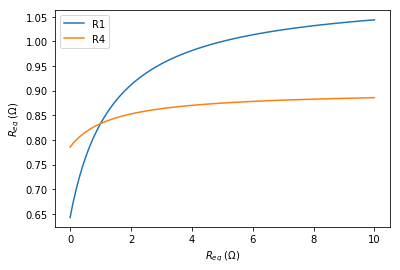

CPU times: user 1.49 s, sys: 43.5 ms, total: 1.53 s
Wall time: 1.53 s


In [16]:
%%time
plt.plot(rvals,req1,label="R1")
plt.plot(rvals,req2,label="R4")
plt.ylabel(r'$R_{eq} \; (\Omega)$')
plt.xlabel(r'$R_{eq} \; (\Omega)$')
plt.legend()
plt.show()